<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Ajustes de Função de Densidade de Probabilidade (PDF)

**Descrição da atividade**: Ajustar as melhores PDFs para cada um dos dados considerados neste trabalho. O ajuste deve ser feito somente para os dados de flutuação, uma vez que, a caracterização base já descreve o comportamento geral dos dados acumulados, que não possuem flutuações. Assim, as variáveis consideradas nesta atividade serão o `Número Diário de Casos (NDC)`, `Número Diário de Mortes (NDM)` e `Número Diário de Testes (NDT)`. Para este documento é feito a caracterização dos dados considerando a análise de Cullen-Frey

In [1]:
import scipy.stats
import numpy as np
import pandas as pd
from plotnine import *
from fitter import Fitter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_owd = pd.read_csv('../1_conjunto_de_dados/dataset/data/blueteam_international_update_2020_06_03.csv')
data_owd['date'] = pd.to_datetime(data_owd['date'])

data_owd = data_owd[data_owd['date'] >= '2020-04-01']

Para a realização do ajuste das PDFs de maneira automatizada será feita a utilização do pacote [fitter](https://fitter.readthedocs.io/en/latest/), que através de uma interface simples permite o teste e verificação de mais de 80 tipos de distribuições, essas providas pelo pacote [SciPy](https://www.scipy.org/).

Abaixo as divisões são feitas considerandos cada um dos países analisados neste trabalho.

### Brasil

In [3]:
bra = data_owd[data_owd['iso_code'] == 'BRA']

**Número de casos diários**

In [4]:
bra_newcases = bra.new_cases

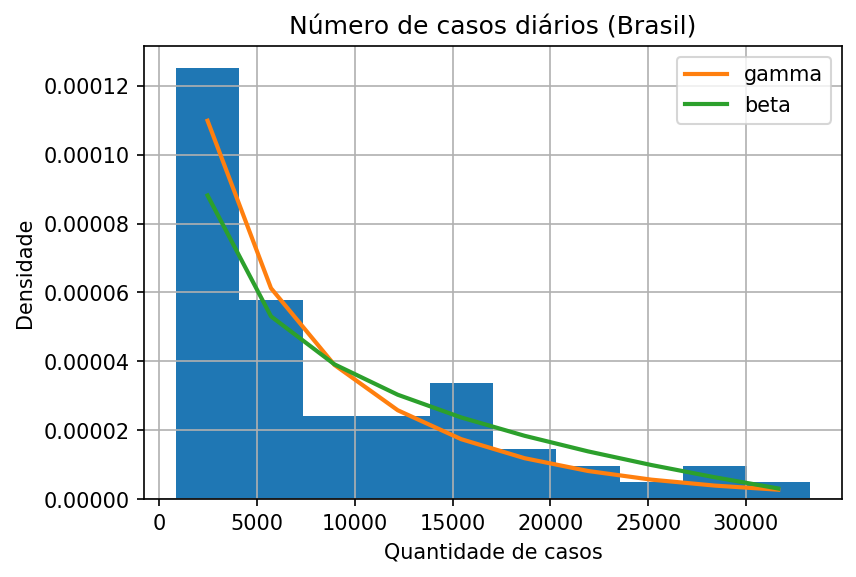

In [5]:
f = Fitter(bra_newcases, verbose = False, distributions = ['beta', 'gamma'], bins = 10)
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Número de casos diários (Brasil)")
plt.xlabel("Quantidade de casos")
plt.ylabel("Densidade")
plt.show()

In [6]:
f.get_best()

{'gamma': (0.7749593943232869, 851.9999999999998, 9615.91983196079)}

**Número de mortes diárias**

In [7]:
bra_newdeaths = bra.new_deaths

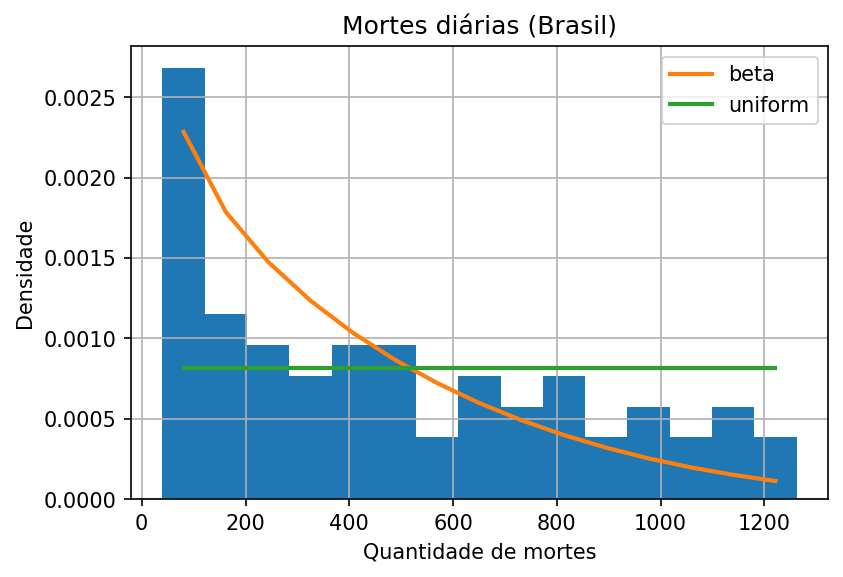

In [8]:
f = Fitter(bra_newdeaths, verbose = False, bins = 15, distributions = ['uniform', 'beta'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Mortes diárias (Brasil)")
plt.xlabel("Quantidade de mortes")
plt.ylabel("Densidade")
plt.show()

In [9]:
f.get_best()

{'beta': (0.8950084879958289,
  4.167998665528845,
  39.99999999999999,
  2050.030476904929)}

**Número de testes diários**

In [10]:
# Infelizmente não há testes suficientes para este ajuste

### Canadá

In [11]:
can = data_owd[data_owd['iso_code'] == 'CAN']

**Número de casos diários**

In [12]:
can_newcases = can.new_cases

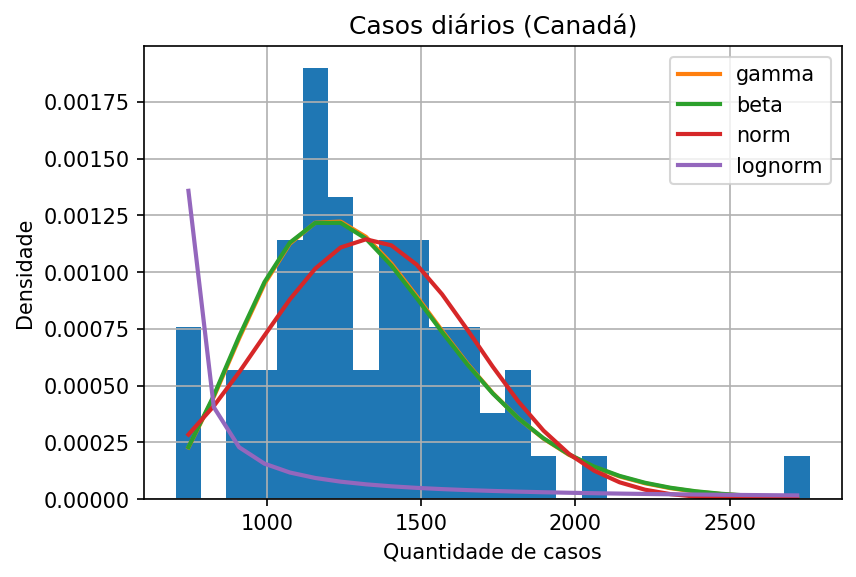

In [13]:
f = Fitter(can_newcases, verbose = False, bins = 25, distributions = ['beta', 'lognorm', 'gamma', 'norm'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Casos diários (Canadá)")
plt.xlabel("Quantidade de casos")
plt.ylabel("Densidade")
plt.show()

In [14]:
f.get_best()

{'gamma': (7.5463019909565165, 383.5520570257862, 125.11854460560227)}

**Número de mortes diárias**

In [15]:
can_newdeaths = can.new_deaths

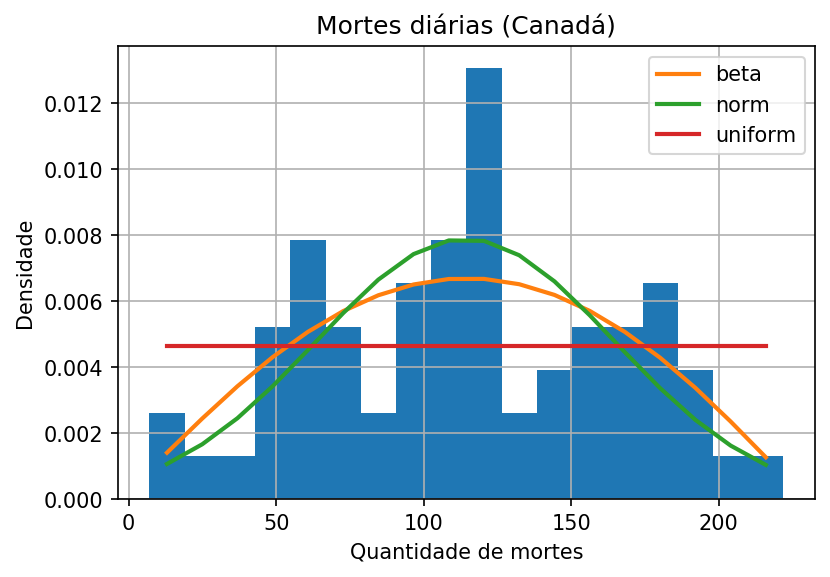

In [16]:
f = Fitter(can_newdeaths, verbose = False, bins = 18, distributions = ['beta', 'uniform', 'norm'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Mortes diárias (Canadá)")
plt.xlabel("Quantidade de mortes")
plt.ylabel("Densidade")
plt.show()

In [17]:
f.get_best()

{'beta': (2.2157010598871754,
  2.182320151946118,
  -5.04435340407991,
  236.23495072418032)}

**Número de testes diários**

In [18]:
can_newtests = can[~can.new_tests.isna()].new_tests

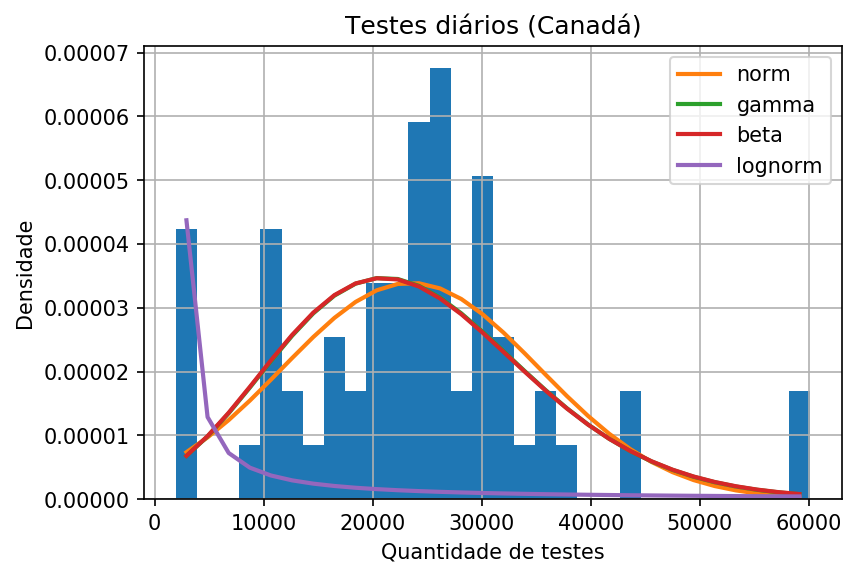

In [19]:
f = Fitter(can_newtests, verbose = False, bins = 30, distributions = ['lognorm', 'norm', 'gamma', 'beta'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Testes diários (Canadá)")
plt.xlabel("Quantidade de testes")
plt.ylabel("Densidade")
plt.show()

In [20]:
f.get_best()

{'norm': (23497.475409836065, 11764.901901044419)}

### México

In [21]:
mex = data_owd[data_owd['iso_code'] == 'MEX']

**Número de casos diários**

In [22]:
mex_newcases = mex.new_cases

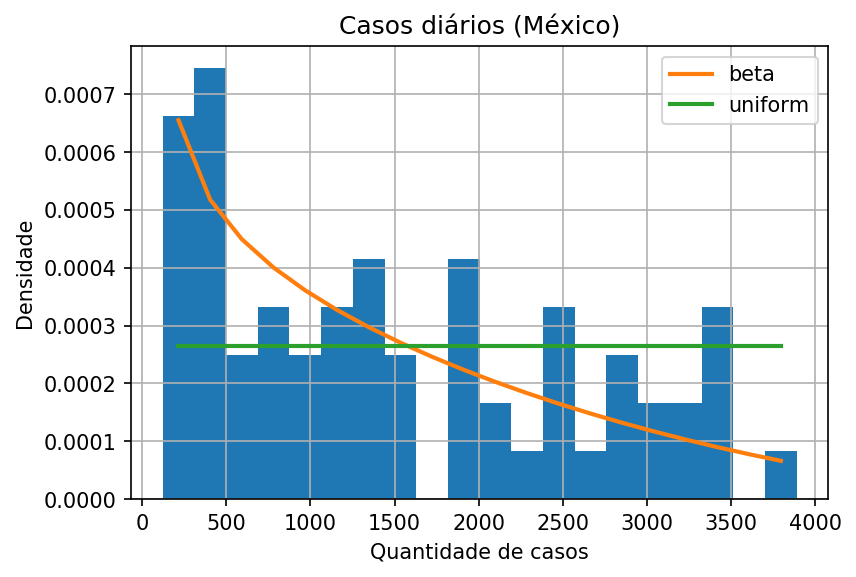

In [23]:
f = Fitter(mex_newcases, verbose = False, bins = 20, distributions = ['beta', 'uniform'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Casos diários (México)")
plt.xlabel("Quantidade de casos")
plt.ylabel("Densidade")
plt.show()

In [24]:
f.get_best()

{'beta': (0.8367774169014626,
  2.6228999960284987,
  120.99999999999999,
  5621.027153167609)}

**Número de mortes diárias**

In [25]:
mex_newdeaths = mex.new_deaths

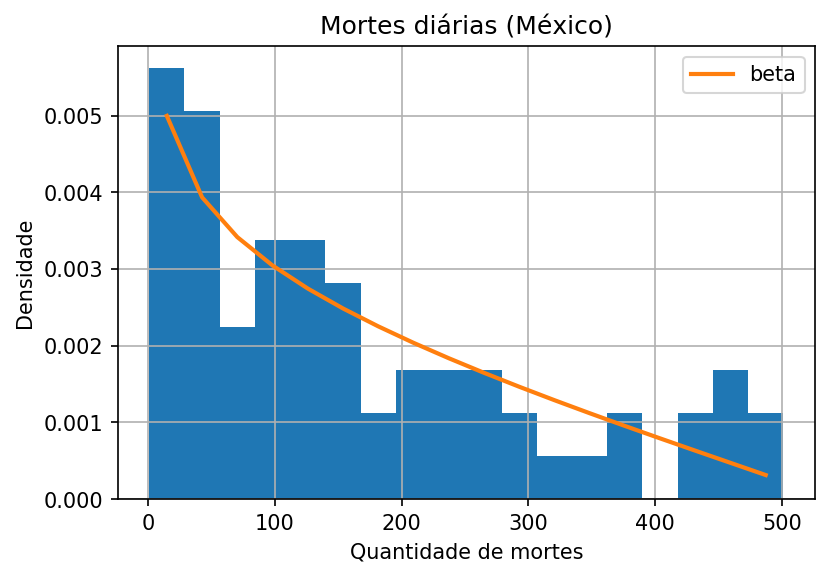

In [26]:
f = Fitter(mex_newdeaths, verbose = False, bins = 18, distributions = ['beta'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Mortes diárias (México)")
plt.xlabel("Quantidade de mortes")
plt.ylabel("Densidade")
plt.show()

In [27]:
f.get_best()

{'beta': (0.8287867541636678,
  1.934520345601309,
  0.9999999999999999,
  538.0504101366855)}

**Número de testes diários**

In [28]:
mex_newtests = mex[~mex.new_tests.isna()].new_tests

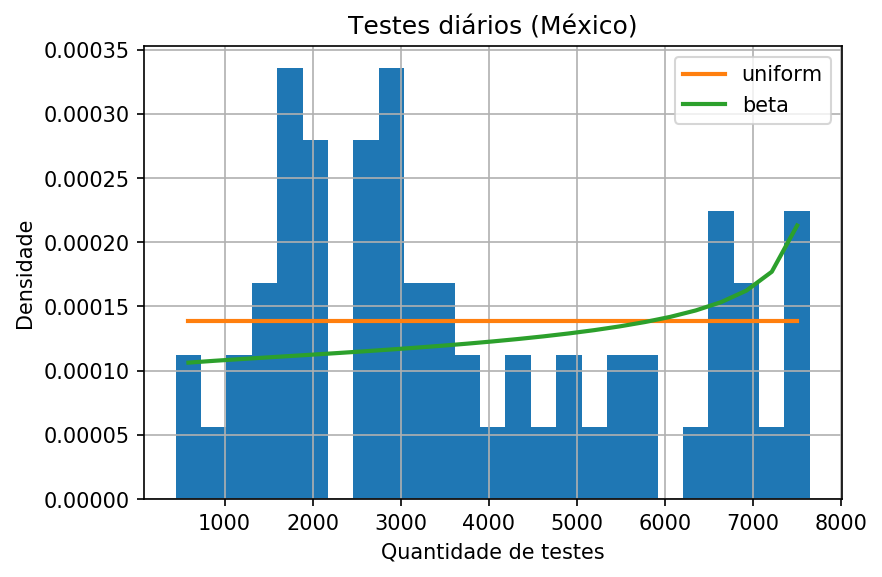

In [29]:
f = Fitter(mex_newtests, verbose = False, bins = 25, distributions = ['beta', 'uniform'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Testes diários (México)")
plt.xlabel("Quantidade de testes")
plt.ylabel("Densidade")
plt.show()

In [30]:
f.get_best()

{'uniform': (445.0, 7200.0)}

### Cuba

In [31]:
cub = data_owd[data_owd['iso_code'] == 'CUB']

**Número de casos diários**

In [32]:
cub_newcases = cub.new_cases

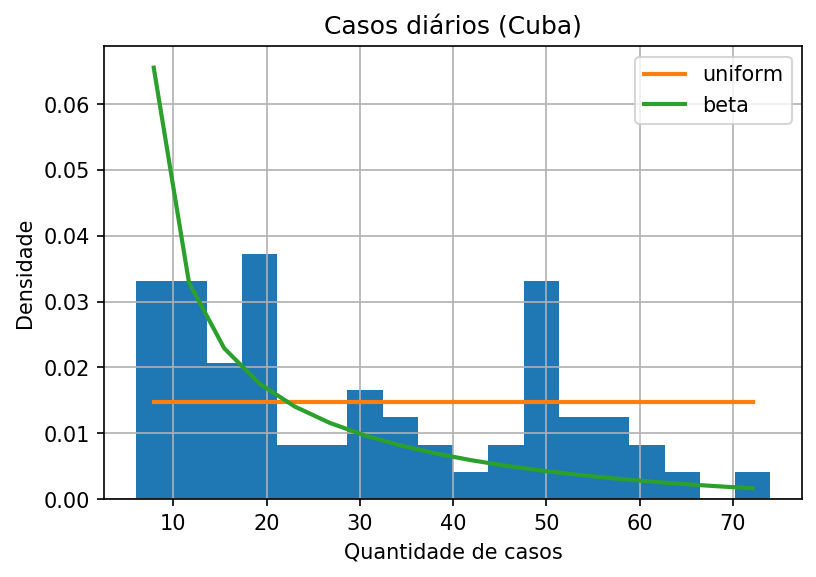

In [33]:
f = Fitter(cub_newcases, verbose = False, bins = 18, distributions = ['uniform', 'beta'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Casos diários (Cuba)")
plt.xlabel("Quantidade de casos")
plt.ylabel("Densidade")
plt.show()

In [34]:
f.get_best()

{'uniform': (6.0, 68.0)}

**Número de mortes diárias**

In [35]:
cub_newdeaths = cub.new_deaths

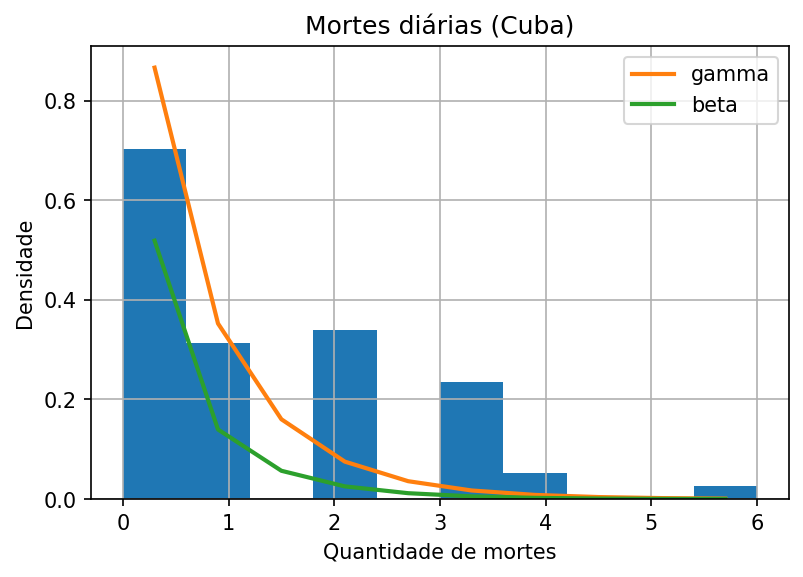

In [36]:
f = Fitter(cub_newdeaths, verbose = False, bins = 10, distributions = ['beta', 'gamma'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Mortes diárias (Cuba)")
plt.xlabel("Quantidade de mortes")
plt.ylabel("Densidade")
plt.show()

In [37]:
f.get_best()

{'gamma': (0.8126909117493606, -3.170778129088007e-28, 0.865779991655457)}

**Número de testes diários**

In [38]:
cub_newtests = cub[~cub.new_tests.isna()].new_tests

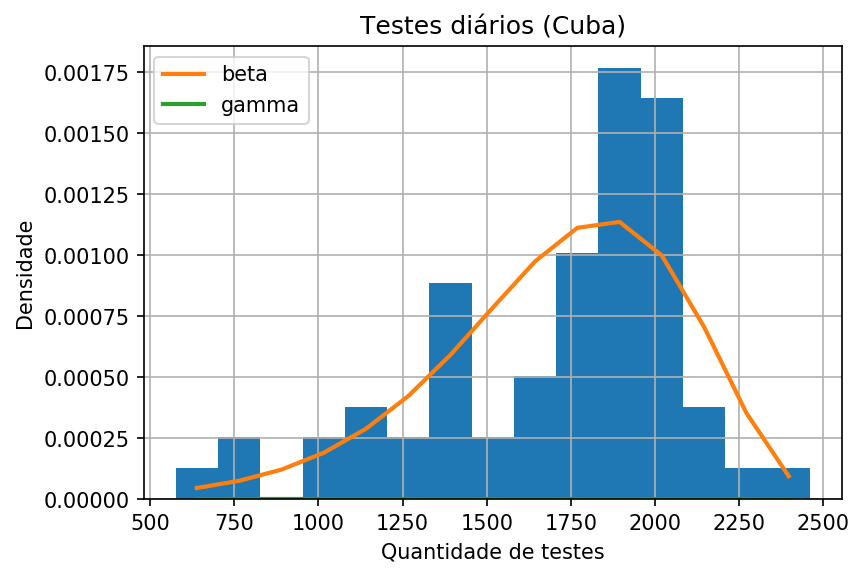

In [39]:
f = Fitter(cub_newtests, verbose = False, bins = 15, distributions = ['beta', 'gamma'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Testes diários (Cuba)")
plt.xlabel("Quantidade de testes")
plt.ylabel("Densidade")
plt.show()

In [40]:
f.get_best()

{'beta': (2618396.6429512724,
  6.371303991257628,
  -387637700.6930884,
  387640350.24705195)}

### Rússia

In [41]:
rus = data_owd[data_owd['iso_code'] == 'RUS']

**Número de casos diários**

In [42]:
rus_newcases = rus.new_cases

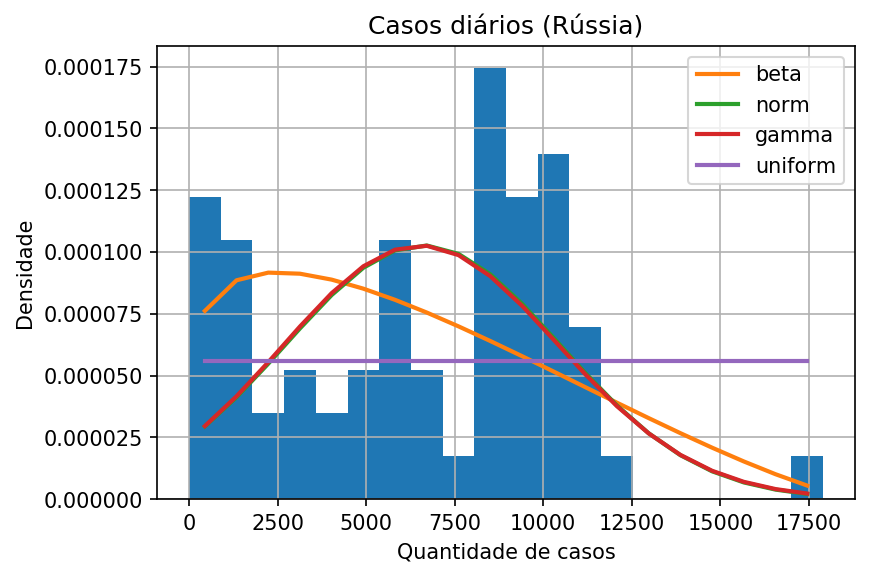

In [43]:
f = Fitter(rus_newcases, verbose = False, bins = 20, distributions = ['norm', 'uniform', 'beta', 'gamma'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Casos diários (Rússia)")
plt.xlabel("Quantidade de casos")
plt.ylabel("Densidade")
plt.show()

In [44]:
f.get_best()

{'beta': (1.2127431444817118,
  2.366965625617821,
  -52.19445438328814,
  19054.958858095786)}

**Número de mortes diárias**

In [45]:
rus_newdeaths = rus.new_deaths

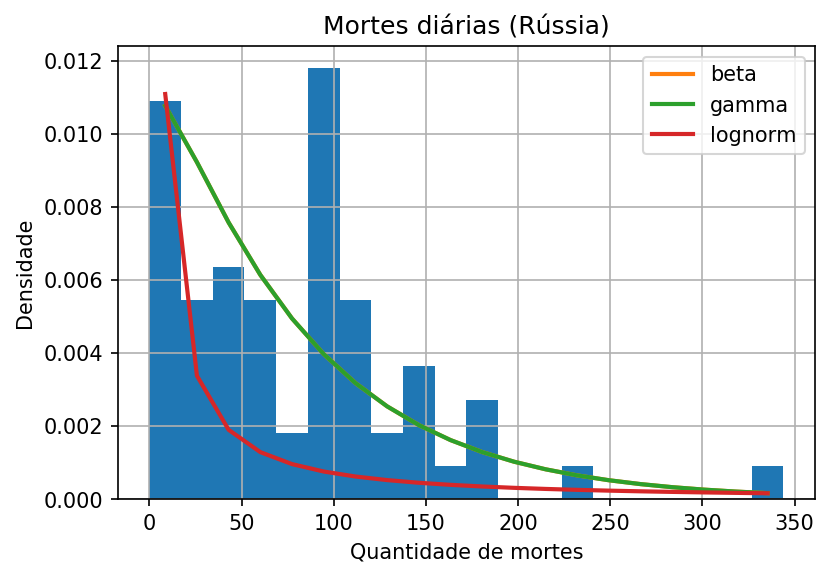

In [46]:
f = Fitter(rus_newdeaths, verbose = False, bins = 20, distributions = ['lognorm', 'gamma', 'beta'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Mortes diárias (Rússia)")
plt.xlabel("Quantidade de mortes")
plt.ylabel("Densidade")
plt.show()

In [47]:
f.get_best()

{'beta': (1.0735346671182537,
  747369.8777253004,
  -0.11270402773005164,
  54762055.38339506)}

**Número de testes diários**

In [48]:
rus_newtests = rus[~rus.new_tests.isna()].new_tests

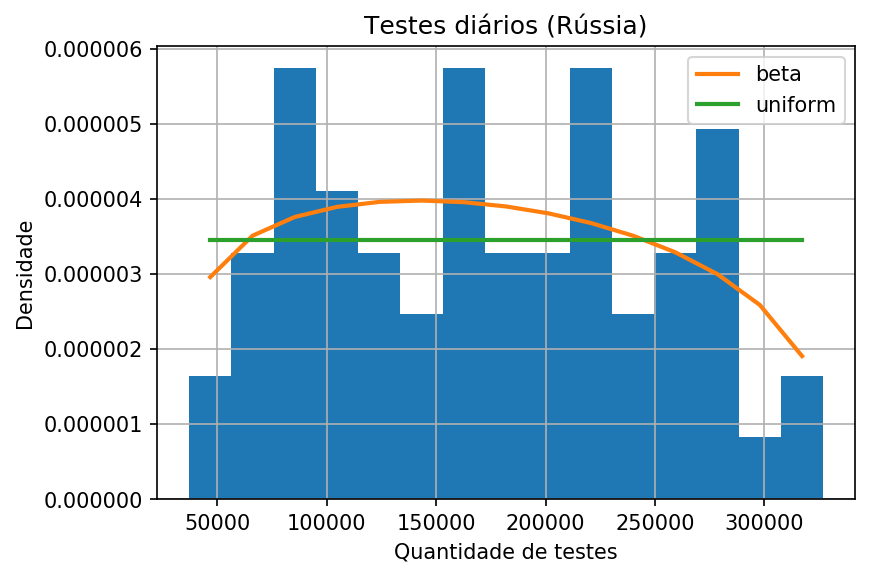

In [49]:
f = Fitter(rus_newtests, verbose = False, bins = 15, distributions = ['beta', 'uniform'])
f.fit()
plt.figure(dpi = 150)
f.summary()
plt.title("Testes diários (Rússia)")
plt.xlabel("Quantidade de testes")
plt.ylabel("Densidade")
plt.show()

In [50]:
f.get_best()

{'beta': (1.1918199074219156,
  1.3392525965320443,
  35815.15028149585,
  293793.95305000903)}